# **Project 3**, APS1070 Winter 2023
#### **PCA [10 marks]**
**Deadline: Mar 13th, 23:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

In this project we work on a COVID-19 vaccination dataset for different countries at the end of each day.

Please fill out the following:


*   **Name**: Manish Kumar
*   **Student number**: 1009645840



### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858 



# Part 1: Getting started [1 Marks]

In [1]:
import pandas as pd
cases_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/APS1070-W23/datasets/main/country_vaccinations_wide.csv',
    index_col=0
)

1. Write a function to do the following: **[0.25]**
    * Takes the dataframe, and your country list as inputs (United States, China, Canada, ...)
    * Plots time-series for the input list (it is best to plot each country in a separate graph (subplot), so you can easily compare them.)
    
2. Apply `StandardScalar` to the data. Each day should have a `mean` of zero and a `StD` of 1. **[0.25]**
3. Run the function in `step 1` on the standardized dataset for the `United States`, `China`, and `Canada`.   **[0.25]**
4. Discuss the trends in the standardized time-series for the `United States`, `Canada`, and `China`. What does it mean if the curve goes up or down (are the number of vaccinations negative?) What does the sign of values indicate? **[0.25]**

**Answers**

---
4. In 'United States' and 'China' standardized time-series shows the positive trend on each day in the given period of time which implies that the vaccinations done on each day is always higher than the average vaccinations done in that particular country. Whereas in case of 'Canada', a negative trend can be seen in the plots which implies that the vaccinations performed on that particular day is less than the national average.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_squared_log_error
import matplotlib.lines as mlines
from matplotlib import gridspec

df = cases_raw 
df.head()

,2020-12-02,2020-12-03,2020-12-04,2020-12-05,2020-12-06,2020-12-07,2020-12-08,2020-12-09,2020-12-10,2020-12-11,...,2022-03-20,2022-03-21,2022-03-22,2022-03-23,2022-03-24,2022-03-25,2022-03-26,2022-03-27,2022-03-28,2022-03-29
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8665.0,7492.0,6319.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1854.0,1923.0,1821.0,1821.0,1821.0,0.0,0.0,0.0,0.0,0.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40794.0,39138.0,37482.0,35827.0,34171.0,34171.0,0.0,0.0,0.0,0.0


In [3]:
from matplotlib import figure

## X axis labels for all the plots in this project
time          = df.columns
x_labels      = [time[i] for i in range(0, len(time), 69)] + [time[-1]]


## Plotting function to plot data as timeseries for countries
def plot_covid(df, country_list, main_title = ' '):
  n_subplots = len(country_list)
  if n_subplots <3:
    s_nrows = max(n_subplots//3, 1)
    s_ncols = n_subplots%3
  elif (n_subplots%3==0):
    s_nrows = n_subplots//3
    s_ncols = 3
  else:
    s_nrows = n_subplots//3 + 1
    s_ncols = 3

  fig, (ax) = plt.subplots(nrows=s_nrows, ncols=s_ncols, figsize=(16,6))

  for idx, ax in enumerate(np.array(ax).flatten()):
    y_cases       = df.loc[country_list[idx]]
    ax.plot(time, y_cases, color='red')
    ax.plot(time, np.zeros(len(time)), color='black')
    ax.set(xticks=x_labels, box_aspect=1, title = country_list[idx])
    ax.set_xticklabels(x_labels, rotation=45)
    ax.set_xlabel('Dates')
    ax.set_ylabel('Vaccinations')
  fig.suptitle(main_title, size=20)
  fig.tight_layout()
  plt.show()
  plt.close()

In [4]:
## Normalizing dataframe
scaler  = StandardScaler().fit(df)
X_std   = scaler.transform(df)
df_norm = pd.DataFrame(data=X_std, index=df.index, columns=df.columns)
df_norm.head()

,2020-12-02,2020-12-03,2020-12-04,2020-12-05,2020-12-06,2020-12-07,2020-12-08,2020-12-09,2020-12-10,2020-12-11,...,2022-03-20,2022-03-21,2022-03-22,2022-03-23,2022-03-24,2022-03-25,2022-03-26,2022-03-27,2022-03-28,2022-03-29
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,-0.067116,-0.067116,-0.067116,-0.067116,...,-0.155165,-0.154819,-0.160975,-0.174895,-0.171720,-0.173916,-0.173187,-0.17142,-0.17217,-0.171609
Albania,0.0,0.0,0.0,0.0,0.0,0.0,-0.067116,-0.067116,-0.067116,-0.067116,...,-0.174859,-0.171262,-0.174405,-0.169495,-0.166377,-0.173916,-0.173187,-0.17142,-0.17217,-0.171609
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,-0.067116,-0.067116,-0.067116,-0.067116,...,-0.180220,-0.176941,-0.179842,-0.174895,-0.171720,-0.173916,-0.173187,-0.17142,-0.17217,-0.171609
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,-0.067116,-0.067116,-0.067116,-0.067116,...,-0.180220,-0.176941,-0.179842,-0.174895,-0.171720,-0.173916,-0.173187,-0.17142,-0.17217,-0.171609
Angola,0.0,0.0,0.0,0.0,0.0,0.0,-0.067116,-0.067116,-0.067116,-0.067116,...,-0.062265,-0.061376,-0.067929,-0.068654,-0.071450,-0.073359,-0.173187,-0.17142,-0.17217,-0.171609


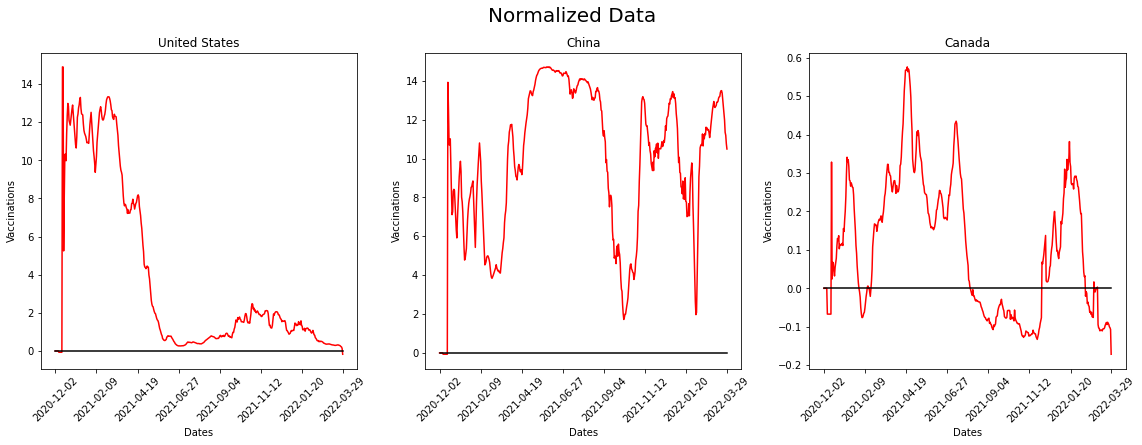

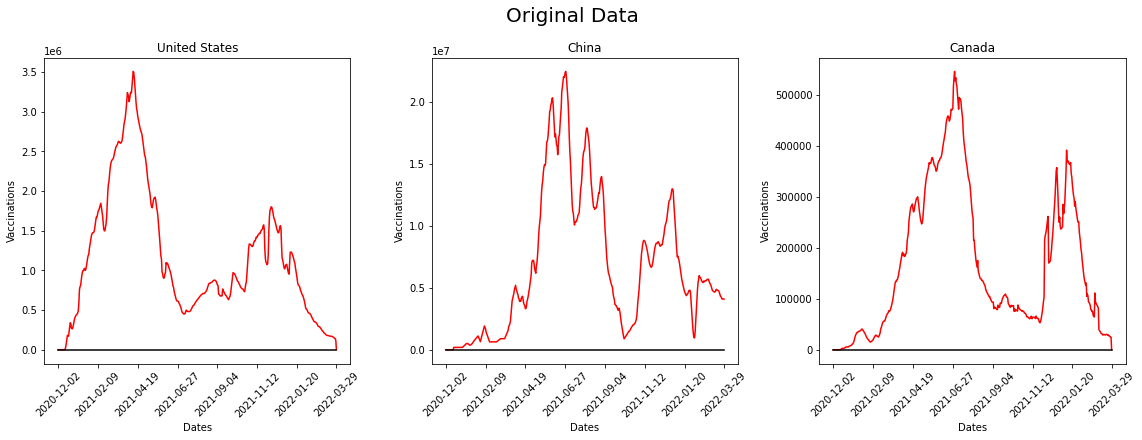

In [5]:
## Plotting Figures with original and normalized data
country_to_plot_data = ['United States', 'China', 'Canada']
plot_covid(df_norm, country_to_plot_data, main_title='Normalized Data')
print("\n\n")
plot_covid(df, country_to_plot_data, main_title='Original Data')

# Part 2: Applying PCA [2 Marks]

1. Compute the covariance matrix of the dataframe. *Hint: The dimensions of your covariance matrix should be (511, 511).* **[0.25]**
2. Write a function `get_sorted_eigen(df_cov)` that gets the covariance matrix of dataframe `df` (from step 1), and returns sorted eigenvalues and eigenvectors using `np.linalg.eigh`. **[0.25]**
3. Show the effectiveness of your principal components in covering the variance of the dataset by superimposing the cumulative explained variance to a scree plot. **[0.25]**
4. How many PCs do you need to cover 99% of the dataset's variance? Write an expression for this. **[0.25]** **[0.25]**
5. Plot the first 16 principal components (Eigenvectors) as a time series (16 subplots, on the x-axis you have dates and on the y-axis you have the value of the PC element) . **[0.5]**
6. Compare the first two PCs with the rest of them. Do you see any difference in their trend? **[0.5]**

**Answers**

---
4. The number of PC's needed to cover 99% of the data is 8. This can be calculated using cumulative explained variances. The cumulative explained variance shows the accumulation of variance for each principal component number. The individual explained variance describes the variance of each principal component. Let $\lambda_i$ represents the i$^{th}$ eigenvalues of the covariance matrix of the given data when arranged in descending order, and $\sum λ$ represents the total sum of all the eigenvalues of the covariance matrix. The expression for calculation the cummulative explained variance is given as,

$\qquad$ Cummulative Variance = $\sum_{i=1}^{n} \frac{\lambda_i}{(\sum \lambda)}×100 $, 

$\;\:$

6. The first two PCs captures the largest amount of variance in the data, and as a result, it can be interpreted as the main underlying pattern or trend in the data. Although it is hard to interpret which characteristic these two are representing but as we move higher up the PCs (as can be interpreted more prominently in PC 5 and higher), high noise signal can be seen which indicates that the remaining PCs may be less informative which may be capturing noise, measurement error, or capturting the minor particular details in the trends. 

In [6]:
## Computing Covariance matrix of Normalized data
CovMat_norm = np.cov(df_norm.T)

In [7]:
## Function to get sorted eigenvalues and corresponding eigenvectors
def get_sorted_eigen(df_cov):
  eigenValues, eigenVectors = np.linalg.eigh(df_cov) 
  args = (-eigenValues).argsort()
  eigenValues = eigenValues[args]
  eigenVectors = eigenVectors[:, args]
  
  return [eigenValues, eigenVectors]

Number of PCs required to achieve 99% of dataset's variance are: 8





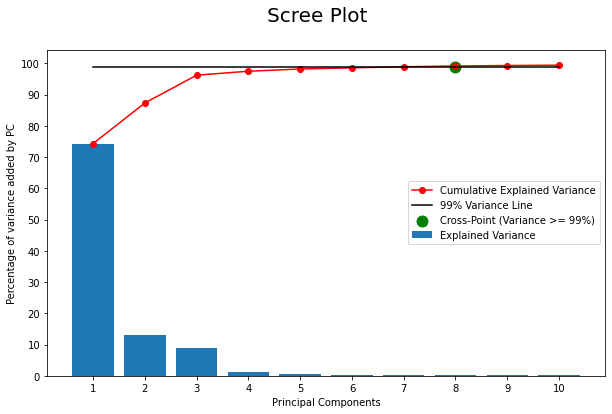

In [8]:
## Effectiveness of the Principal components
eigenValues_pca, eigenVectors_pca   = get_sorted_eigen(CovMat_norm)
expVar      = [(eigV/sum(eigenValues_pca))*100 for eigV in eigenValues_pca]
cumExpVar   = np.cumsum(expVar)

## Number of PCs to achieve 99% variance
for idx in range(len(cumExpVar)):
  if cumExpVar[idx]>=99:
    n_pc_99 = idx+1
    break
print("Number of PCs required to achieve 99% of dataset's variance are:", n_pc_99)
print('\n\n')

## Plotting Scree plot
fig, ax = plt.subplots(nrows=1, figsize=(10,6))
ax.bar(range(10), expVar[0:10], label='Explained Variance')
ax.plot(cumExpVar[0:10], 'r-o', label='Cumulative Explained Variance')
ax.plot(np.linspace(0, 9, num=10), 99*np.ones(10), markevery=[7], color='black',
        label='99% Variance Line')
ax.scatter((n_pc_99-1), 99, marker='o', color='green', s=120, 
           label='Cross-Point (Variance >= 99%)')
ax.set_xticks(range(10), range(1, 11))
ax.set_xlabel('Principal Components')
ax.set_yticks(np.arange(0,101,10))
ax.set_ylabel('Percentage of variance added by PC')
fig.suptitle('Scree Plot', size=20)
plt.legend(loc='right')

plt.show()

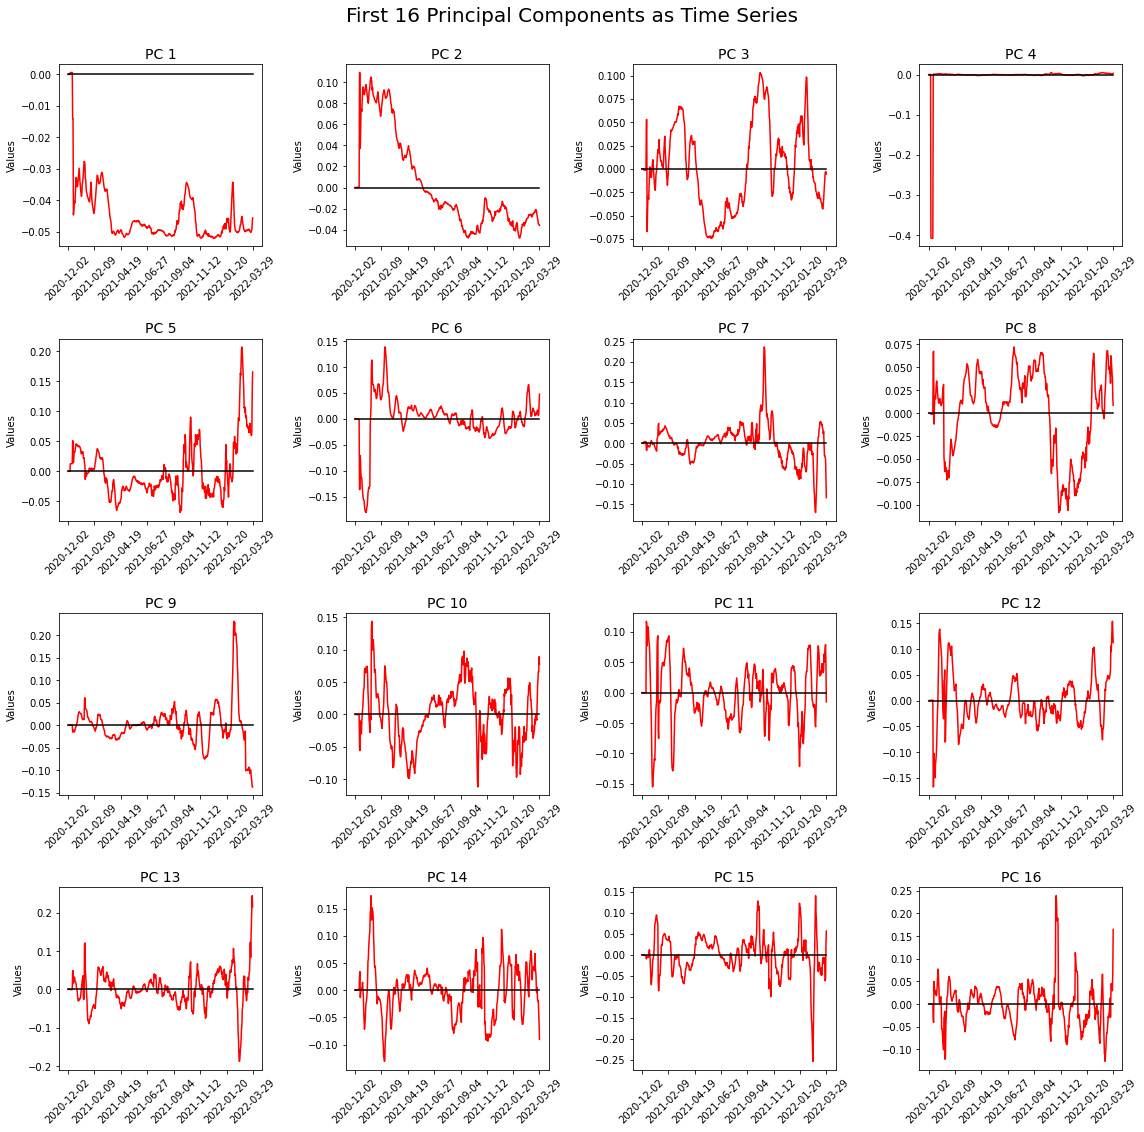

In [9]:
## Set up the plot and plot first 16 principal components
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))

for i, ax in enumerate(axes.flatten()):
    ax.plot(time, eigenVectors_pca[:,i], color='red')
    ax.plot(time, np.zeros(len(df.columns)), color='black')
    ax.set(xticks=x_labels, autoscale_on=1)
    ax.set_xticklabels(x_labels, rotation=45)
    ax.set_title(f'PC {i+1}', size=14)
    # ax.set_xlabel('Dates')
    ax.set_ylabel('Values')
fig.suptitle('First 16 Principal Components as Time Series', size=20)
fig.tight_layout(rect=[0, 0, 1, 0.98], h_pad=2)

plt.show()

# Part 3: Data reconstruction [3 Marks]

Create a function that:

*   Accepts a country and the original dataset as inputs.
*   Calls useful functions that you designed in previous parts to compute eigenvectors and eigenvalues. 
*   Plots 4 figures:
  1.   The original time-series for the specified country. **[0.5]**
  2.   The incremental reconstruction of the **original** (not standardized) time-series for the specified country in a single plot. **[1.5]**
       * You should at least show 5 curves in a figure for incremental reconstruction. For example, you can pick the following (or any other combination that you think is reasonable): 
          * Reconstruction with only PC1
          * Reconstruction with both PC1 and PC2
          * Reconstruction with PC1 to PC4 (First 4 PCs)
          * Reconstruction with PC1 to PC8 (First 8 PCs)
          * Reconstruction with PC1 to PC16 (First 16 PCs)

      * Hint: you need to compute the reconstruction for the standardized time-series first, and then scale it back to the original (non-standardized form) using the StandardScaler `inverse_transform` [help...](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.inverse_transform)
  3.   The residual error for your best reconstruction with respect to the original time-series. **[0.5]**
      * Hint: You are plotting the error that we have for reconstructing each day `(df - df_reconstructed)`. On the x-axis, you have dates, and on the y-axis, the residual error. 
  4.   The RMSE of the reconstruction as a function of the number of included components (x-axis is the number of components and y-axis is the RMSE). Sweep x-axis from 1 to 10 (this part is independent from part 3.2.) **[1]**

Test your function using the `United States`, `Canada`, and `China` as inputs. **[0.5]**


In [10]:
def proj_recons(pd_data, eigen_vectors, n_PC = 1):
  PC_count  = n_PC
  W         = eigen_vectors[:, 0:PC_count]
  projX     = np.dot(pd_data, W)
  ReconX    = np.dot(projX, W.T)
  df_ReconX = pd.DataFrame(data=ReconX, index=pd_data.index, columns=pd_data.columns)
  
  return [df_ReconX, projX, ReconX]

In [11]:
def data_reconstruction_pca(df, df_norm, country_name):
  ## Calculation eigenvectors and eigenvalues
  CovMatrix                     = CovMat_norm ## Covariance matrix of normalized data
  eigen_values_pca, eigen_vectors_pca   = get_sorted_eigen(CovMatrix)

  fig, (ax) = plt.subplots(nrows=2, ncols=2, figsize=(12,12), squeeze='False')
  fig.suptitle('Data reconstruction using PCA: '+country_name[0], size=20)
  fig.tight_layout(rect=[0, 0, 1, 0.97], h_pad=10)
  ax = ax.flatten()

  ## Plotting original timeseries for specified country
  y_cases       = df.loc[country_name]
  ax[0].plot(time, y_cases.T, color='red')
  ax[0].plot(time, np.zeros(len(time)), color='black')
  ax[0].set(xticks=x_labels, box_aspect=1, title = 'Original data')
  ax[0].set_xticklabels(x_labels, rotation=45)
  ax[0].set_xlabel('Dates')
  ax[0].set_ylabel('Vaccinations')

  
  ## Data reconstruction
  PC_lables     = ['PC 1', 'PC 1-2', 'PC 1-4', 'PC 1-8', 'PC 1-16', 'PC 1-32']
  PC_count      = [1,2,4,8,16,32]
  plt_colors    = ['red','blue','orange', 'purple', 'cyan', 'green'] 
  df_inv         = {}
  for idx in range(len(PC_count)):
    df_ReconX,_,_ = proj_recons(df_norm, eigen_vectors_pca, n_PC=PC_count[idx]) # reconstructed df from normalized data
    X_inv         = scaler.inverse_transform(df_ReconX) # inverse transform to get the original scaled data from reconstructed data
    df_inv[idx]   = pd.DataFrame(data=X_inv, index=df.index, columns=df.columns)
    y_            = df_inv[idx].loc[country_name]
    ax[1].plot(time, y_.T, color=plt_colors[idx], label=PC_lables[idx])
  ax[1].plot(time, np.zeros(len(time)), color='black')
  ax[1].set_xlabel('Dates')
  ax[1].set_ylabel('Vaccinations')
  ax[1].set(xticks=x_labels, box_aspect=1, title = 'Data reconstruction using PCs')
  ax[1].set_xticklabels(x_labels, rotation=45)
  ax[1].legend(loc='upper right')
  
  ## Best Residual error plot ##################################################
  idx = 5
  y_           = df.loc[country_name] - df_inv[idx].loc[country_name]
  ax[2].plot(time, y_.T, color=plt_colors[idx], label=PC_lables[idx])
  ax[2].plot(time, np.zeros(len(time)), color='black')
  ax[2].set(xticks=x_labels, box_aspect=1, title = 'Residual error (best reconstruction)')
  ax[2].set_xticklabels(x_labels, rotation=45)
  ax[2].set_xlabel('Dates')
  ax[2].set_ylabel('Residual error')
  ax[2].legend(loc='upper right')


  ## RMS Plot ##################################################################
  PC_count      = np.arange(1,33,1)
  x_labels_pcCount = [PC_count[i] for i in range(0, len(PC_count), 
                                                 4)] + [PC_count[-1]]

  y_            = []
  for idx in range(len(PC_count)):
    df_ReconX,_,_ = proj_recons(df_norm, eigen_vectors_pca, n_PC=PC_count[idx]) # reconstructed df from normalized data
    X_inv         = scaler.inverse_transform(df_ReconX) # inverse transform to get the original scaled data from reconstructed data
    df_inv        = pd.DataFrame(data=X_inv, index=df.index, columns=df.columns)

    y_.append(mean_squared_error(df.loc[country_name], 
                                        df_inv.loc[country_name], squared=False))

  ax[3].plot(PC_count, y_)
  ax[3].set_yscale('log')
  ax[3].set(xticks=x_labels_pcCount, box_aspect=1, title = 'RMS error')
  ax[3].set_xlabel('No. of PCs')
  ax[3].set_ylabel('RMS Error')


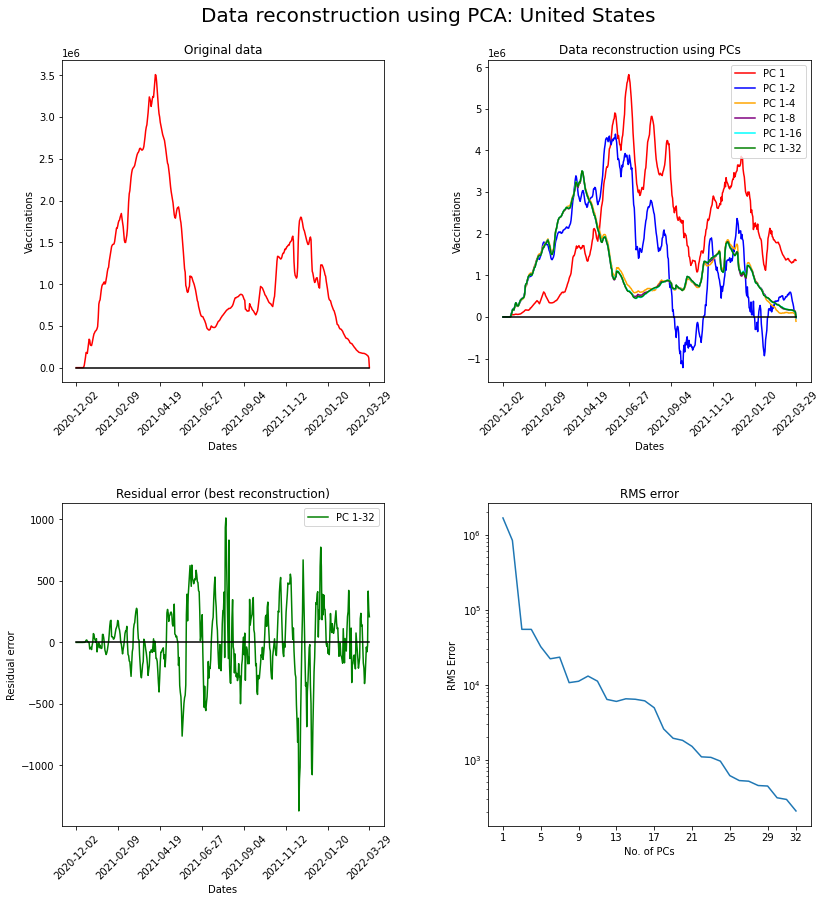

In [12]:
data_reconstruction_pca(df, df_norm, ['United States'])

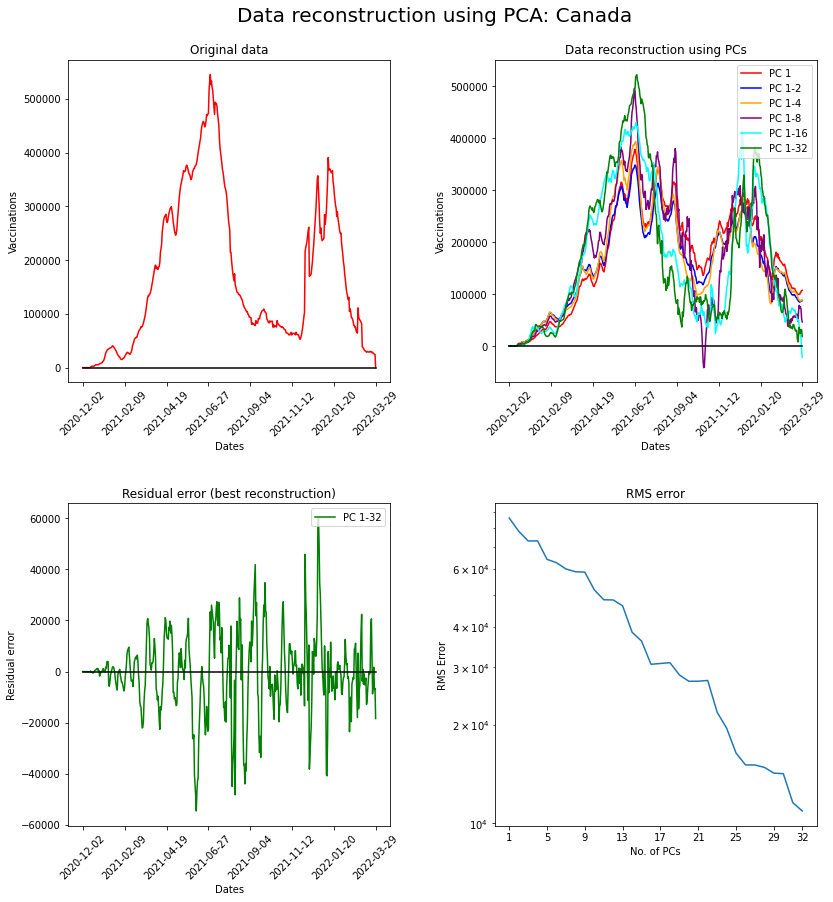

In [13]:
data_reconstruction_pca(df, df_norm, ['Canada'])

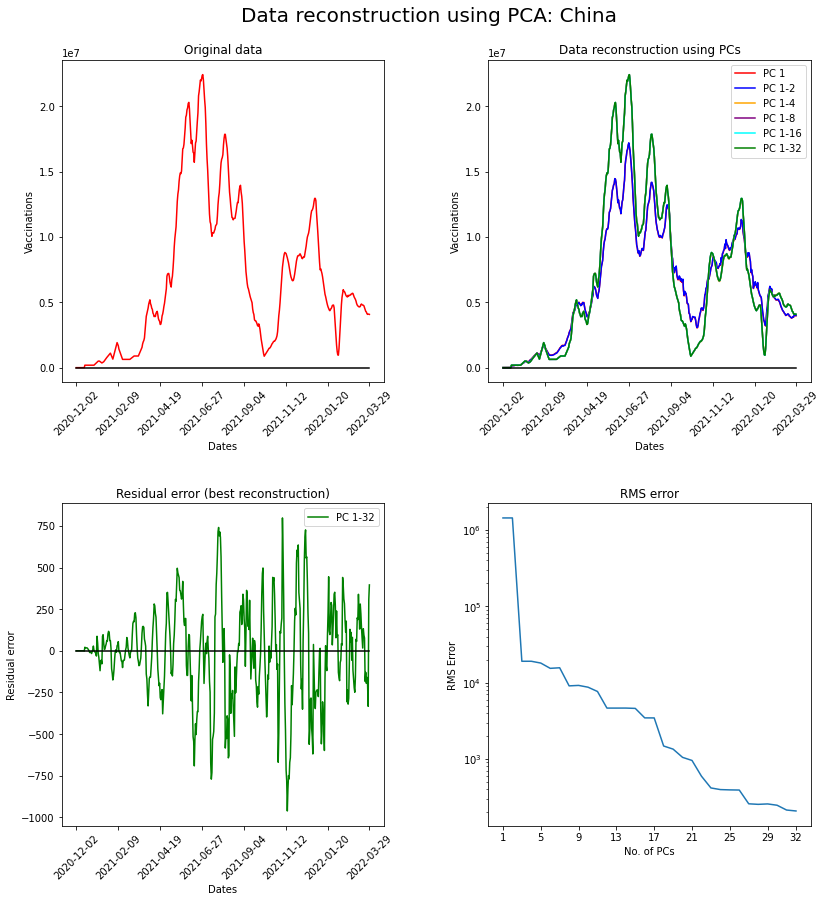

In [14]:
data_reconstruction_pca(df, df_norm, ['China'])

# Part 4: SVD [2 Marks]
Modify your code in part 3 to use SVD instead of PCA for extracting the eigenvectors. **[1]**

Explain if standardization or covariance computation is required for this part.
Repeat part 3 and compare your PCA and SVD results. Write a function to make this comparison **[0.5]**, and comment on the results. **[0.5]**.

**Answers**

---
Regarding standardization and covariance computation, standardization is still required for SVD, as SVD is also sensitive to differences in the scales of the variables. However, computing the covariance matrix is not necessary for SVD, as SVD works directly with the data matrix X.

The comparisions are performed using the RMS error plots for the PCA, SVD on normalized data and SVD performed on non-normalized data. The plots are shown below. As can be seen from the plots, PCA and SVD performed using normalized data gives the same results as the error plots are identical for both the cases. Whereas for non-normalized data, the results are different. 
 





In [15]:
## Function to get eigenvalues and corresponding eigenvectors using SVD for Original data
U_svd, S_svd, Vh_svd = np.linalg.svd(df) 
Smat = np.zeros((df.shape[0], df.shape[1]))
Smat[:len(S_svd), :len(S_svd)] = np.diag(S_svd)
eigenVectors_svd = Vh_svd.T

## Function to get eigenvalues and corresponding eigenvectors using SVD for Normalized data
U_svd_norm, S_svd_norm, Vh_svd_norm = np.linalg.svd(df_norm) 
Smat_norm = np.zeros((df_norm.shape[0], df_norm.shape[1]))
Smat_norm[:len(S_svd_norm), :len(S_svd_norm)] = np.diag(S_svd_norm)
eigenVectors_svd_norm = Vh_svd_norm.T

In [16]:
def data_reconstruction_svd(df, df_norm, country_name, index_type=1, 
                            scaler=scaler):

  if index_type==1: # for provided data of vaccinations
    country_name_str = country_name[0]
    ## X axis labels for all the plots in this project
    time          = df.columns
    x_labels      = [time[i] for i in range(0, len(time), 69)] + [time[-1]]
    y_lable_str   = 'Vaccinations'

  else:
    country_name_str = country_name[0][1]+' '+country_name[0][0]
    ## X axis labels for all the plots in this project
    time          = df_new.columns
    x_labels      = [time[i] for i in range(0, len(time)-100, 103)] + [time[-1]]
    y_lable_str   = 'Deaths'

  
  ## Calculation eigenvectors and eigenvalues ##################################
  ## Original data
  U_svd, S_svd, Vh_svd = np.linalg.svd(df) 
  Smat = np.zeros((df.shape[0], df.shape[1]))
  Smat[:len(S_svd), :len(S_svd)] = np.diag(S_svd)
  eigenVectors_svd = Vh_svd.T
  eigen_values, eigen_vectors             = Smat, eigenVectors_svd
  ## Normalized data
  U_svd_norm, S_svd_norm, Vh_svd_norm = np.linalg.svd(df_norm) 
  Smat_norm = np.zeros((df_norm.shape[0], df_norm.shape[1]))
  Smat_norm[:len(S_svd_norm), :len(S_svd_norm)] = np.diag(S_svd_norm)
  eigenVectors_svd_norm = Vh_svd_norm.T
  eigen_values_norm, eigen_vectors_norm   = Smat_norm, eigenVectors_svd_norm


  ## Plots Initialization ######################################################
  fig, (ax) = plt.subplots(nrows=3, ncols=2, figsize=(12,18), squeeze='False')
  fig.suptitle('Data reconstruction using SVD: '+country_name_str, size=20)
  fig.tight_layout(rect=[0, 0, 1, 0.97], h_pad=10)
  ax = ax.flatten()


  ## Plotting original and normalized timeseries for specified country #########
  y_cases       = df.loc[country_name]
  ax[0].plot(time, y_cases.T, color='red')
  ax[0].plot(time, np.zeros(len(time)), color='black')
  ax[0].set(xticks=x_labels, box_aspect=1, title = 'Original data')
  ax[0].set_xticklabels(x_labels, rotation=45)
  ax[0].set_xlabel('Dates')
  ax[0].set_ylabel(y_lable_str)

  y_cases       = df_norm.loc[country_name]
  ax[1].plot(time, y_cases.T, color='dodgerblue')
  ax[1].plot(time, np.zeros(len(time)), color='black')
  ax[1].set(xticks=x_labels, box_aspect=1, title = 'Normalized data')
  ax[1].set_xticklabels(x_labels, rotation=45)
  ax[1].set_xlabel('Dates')
  ax[1].set_ylabel(y_lable_str)


  ## Data reconstruction #######################################################
  PC_lables     = ['PC 1', 'PC 1-2', 'PC 1-4', 'PC 1-8', 'PC 1-16', 'PC 1-32']
  PC_count      = [1,2,4,8,16,32]
  plt_colors    = ['brown','mediumpurple','orange', 'purple', 'cyan', 'green']
  # Using Original data
  df_inv          = {}
  for idx in range(len(PC_count)):
    df_ReconX,_,_ = proj_recons(df, eigen_vectors, n_PC=PC_count[idx]) # reconstructed df from original data
    X_inv         = df_ReconX # reconstructed data
    df_inv[idx]   = pd.DataFrame(data=X_inv, index=df.index, 
                                  columns=df.columns)
    y_            = df_inv[idx].loc[country_name]
    ax[2].plot(time, y_.T, color=plt_colors[idx], label=PC_lables[idx])

  ## Using Normalized data
  df_inv_n        = {}
  for idx in range(len(PC_count)):
    df_ReconX,_,_ = proj_recons(df_norm, eigen_vectors_norm, n_PC=PC_count[idx]) # reconstructed df from normalized data
    X_inv         = scaler.inverse_transform(df_ReconX) # inverse transform to get the original scaled data from reconstructed data
    df_inv_n[idx] = pd.DataFrame(data=X_inv, index=df.index, columns=df.columns)
    y_            = df_inv_n[idx].loc[country_name]
    ax[3].plot(time, y_.T, color=plt_colors[idx], label=PC_lables[idx])

  # Plot attributed
  ax[2].set_xlabel('Dates')
  ax[2].set_ylabel(y_lable_str)
  ax[2].plot(time, np.zeros(len(time)), color='black')
  ax[2].set(xticks=x_labels, box_aspect=1, 
            title = 'Data reconstruction using\n PCs of Original data')
  ax[2].set_xticklabels(x_labels, rotation=45)
  ax[2].legend(loc='upper right')

  ax[3].plot(time, np.zeros(len(time)), color='black')
  ax[3].set_xlabel('Dates')
  ax[3].set_ylabel(y_lable_str)
  ax[3].set(xticks=x_labels, box_aspect=1, 
            title = 'Data reconstruction using\n PCs of Normalized data')
  ax[3].set_xticklabels(x_labels, rotation=45)
  ax[3].legend(loc='upper right')
  

  ## Residual error plots ######################################################
  idx = 5 # best data reconstruction index
  ## Using Original data
  y_           = df.loc[country_name] - df_inv[idx].loc[country_name]
  ax[4].plot(time, y_.T, color='red', 
             label='using PC 1-32 of original data')
  ax[4].plot(time, np.zeros(len(time)), color='black')

  ## Using Normalized data
  y_           = df.loc[country_name] - df_inv_n[idx].loc[country_name]
  ax[4].plot(time, y_.T, color='dodgerblue',
             label='using PC 1-32 of normalized data')
  ax[4].plot(time, np.zeros(len(time)), color='black')
  
  # Plot attributes
  ax[4].set(xticks=x_labels, box_aspect=1, 
            title = 'Residual error of best reconstructions')
  ax[4].set_xticklabels(x_labels, rotation=45)
  ax[4].set_xlabel('Dates')
  ax[4].set_ylabel('Residual error')
  ax[4].legend(loc='upper right')


  ## RMS Error #################################################################
  PC_count      = np.arange(1,33,1)
  x_labels_pcCount = [PC_count[i] for i in range(0, len(PC_count), 
                                                 4)] + [PC_count[-1]]
  ## Using Original data
  y_            = []
  for idx in range(len(PC_count)):
    df_ReconX,_,_ = proj_recons(df, eigen_vectors, n_PC=PC_count[idx]) # reconstructed df from normalized data
    X_inv         = df_ReconX # inverse transform to get the original scaled data from reconstructed data
    df_inv        = pd.DataFrame(data=X_inv, index=df.index, columns=df.columns)
    y_.append(mean_squared_error(df.loc[country_name], 
                                       df_inv.loc[country_name], squared=False))

  ax[5].plot(PC_count, y_, color='red', 
             label='PCs of original data')

  ## Using Normalized data
  y_norm_       = []
  for idx in range(len(PC_count)):
    df_ReconX,_,_ = proj_recons(df_norm, eigen_vectors_norm, n_PC=PC_count[idx]) # reconstructed df from normalized data
    X_inv         = scaler.inverse_transform(df_ReconX) # inverse transform to get the original scaled data from reconstructed data
    df_inv        = pd.DataFrame(data=X_inv, index=df.index, columns=df.columns)
    y_norm_.append(mean_squared_error(df.loc[country_name], 
                                        df_inv.loc[country_name], squared=False))
  ax[5].plot(PC_count, y_norm_,color='dodgerblue', 
             label='PCs of normalized data')

  # Plot attributes
  ax[5].set_yscale('log')
  ax[5].set(xticks=x_labels_pcCount, box_aspect=1, 
            title = 'RMS error')
  ax[5].set_xlabel('No. of PCs')
  ax[5].set_ylabel('RMS Error')
  ax[5].legend(loc='upper right')

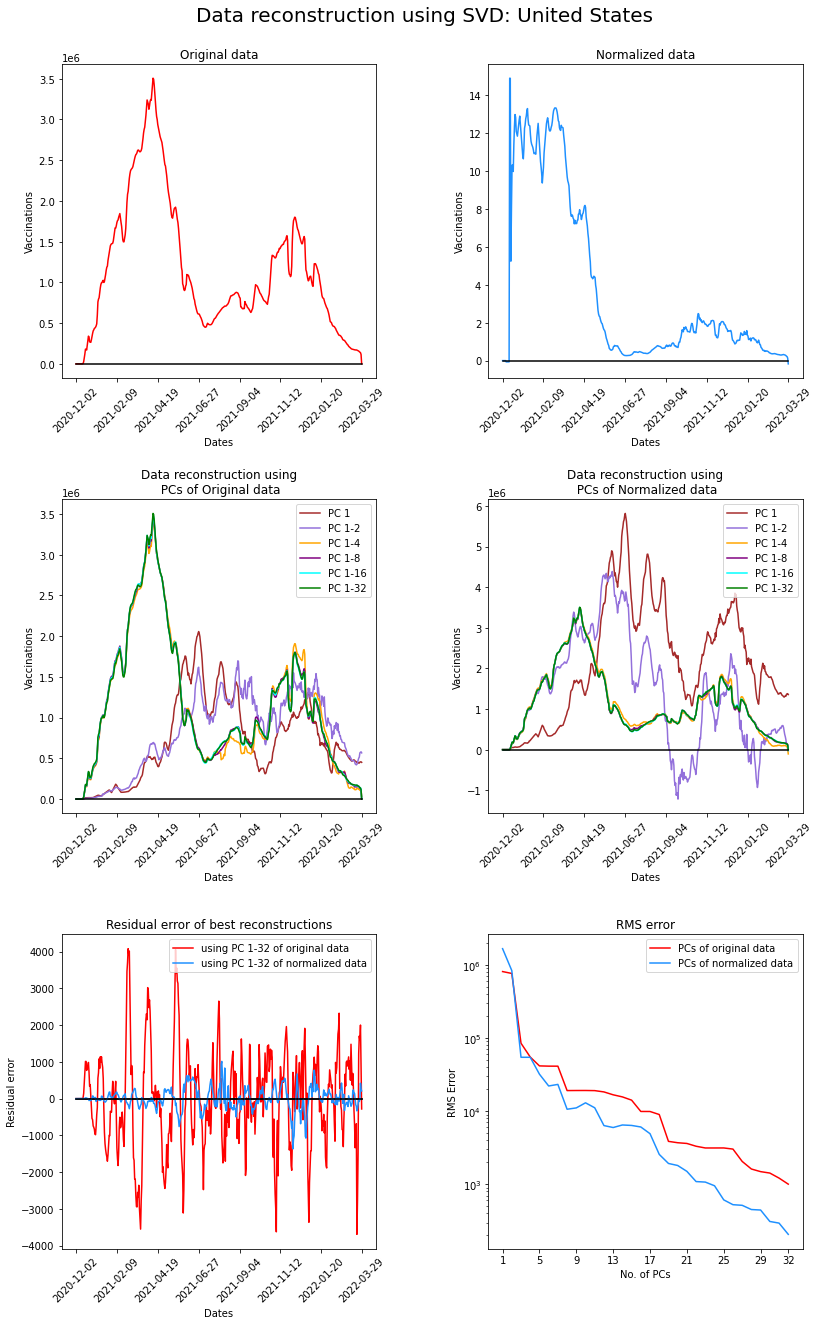

In [17]:
data_reconstruction_svd(df, df_norm, ['United States'])

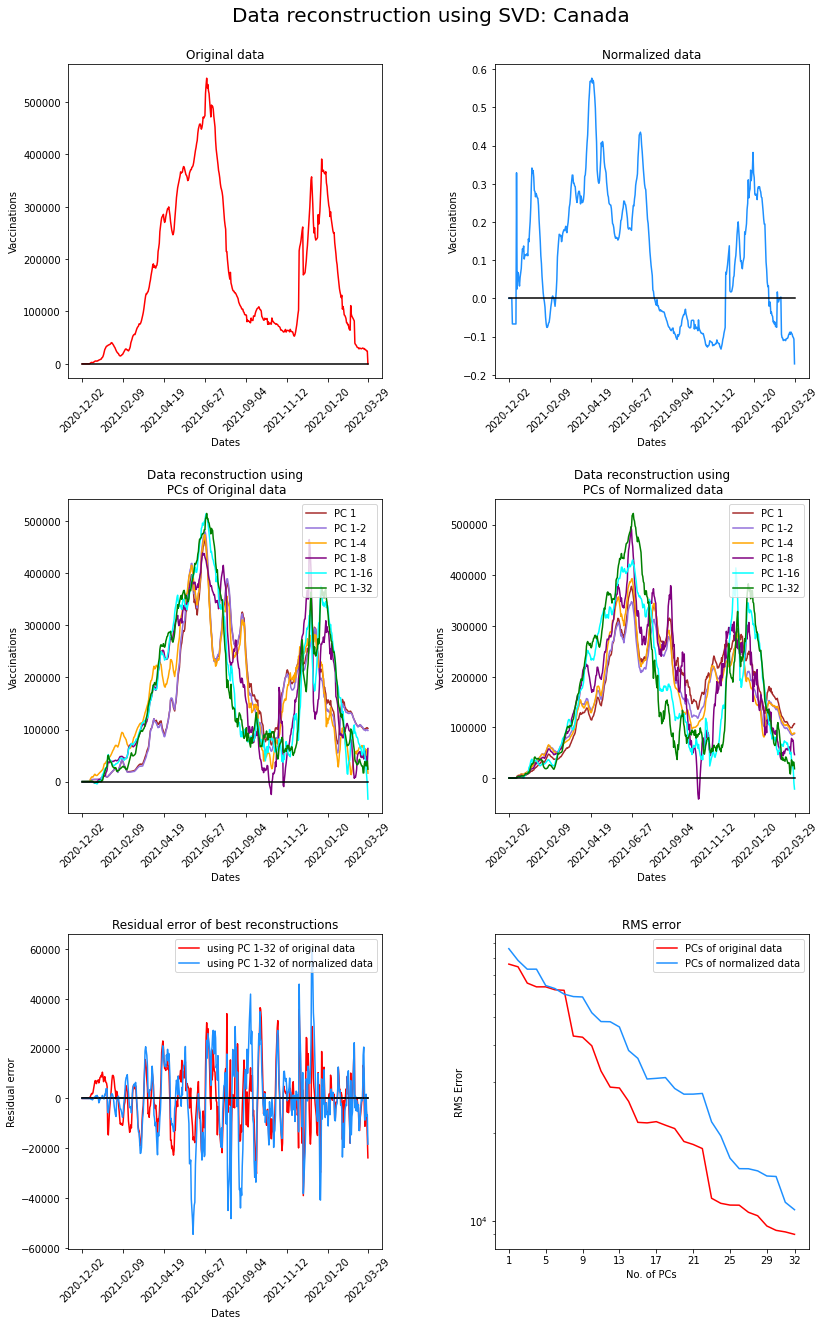

In [18]:
data_reconstruction_svd(df, df_norm, ['Canada'])

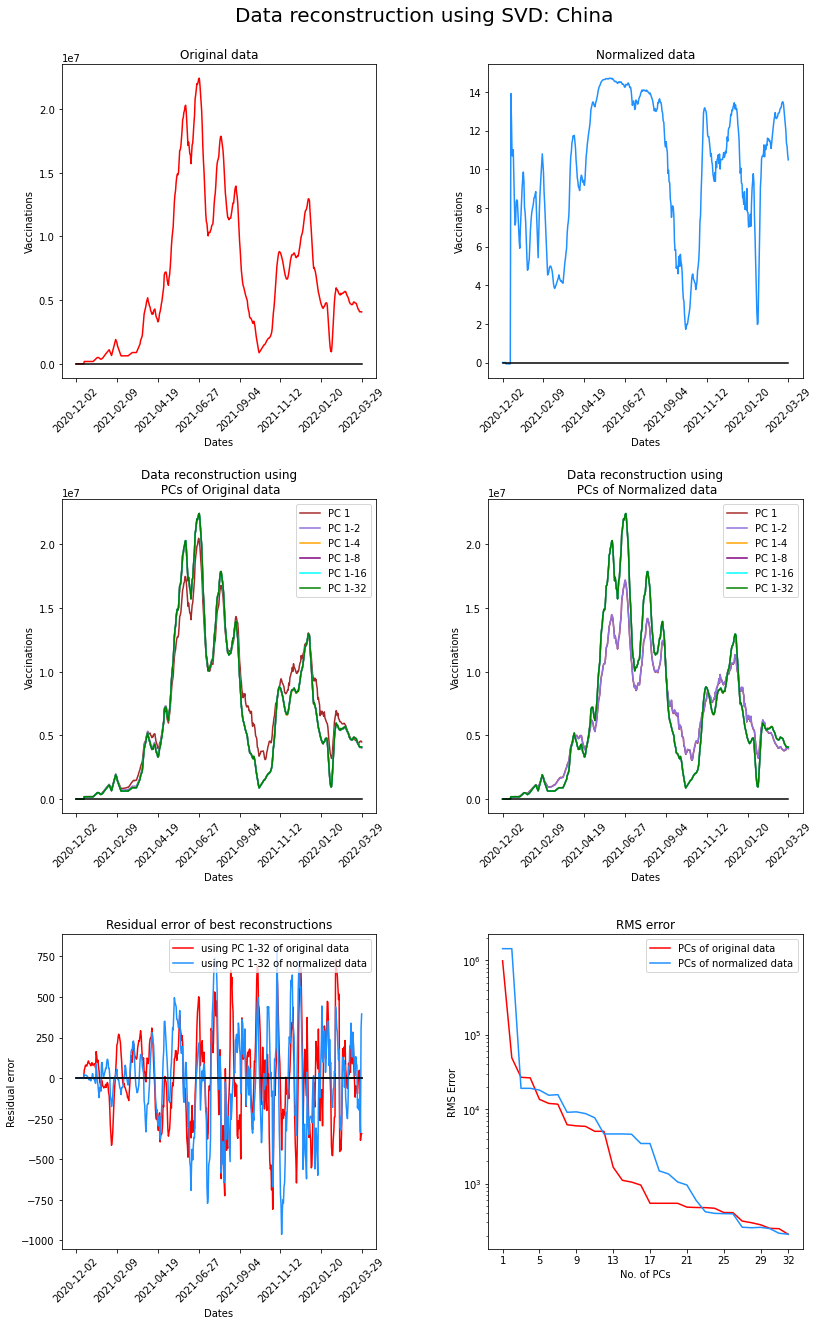

In [19]:
data_reconstruction_svd(df, df_norm, ['China'])

In [20]:
## Function for PCA and SVD comparision
def data_reconstruction_comparision(df, df_norm, country_name, 
                                    index_type=1, scaler=scaler):
  
  if index_type==1: # for provided data of vaccinations
    country_name_str = country_name[0]
    ## X axis labels for all the plots in this project
    time          = df.columns
    x_labels      = [time[i] for i in range(0, len(time), 69)] + [time[-1]]

  else:
    country_name_str = country_name[0][1]+' '+country_name[0][0]
    ## X axis labels for all the plots in this project
    time          = df_new.columns
    x_labels      = [time[i] for i in range(0, len(time)-100, 103)] + [time[-1]]

  ## Calculation eigenvectors and eigenvalues
  ## SVD on Original data
  U_svd, S_svd, Vh_svd = np.linalg.svd(df) 
  Smat = np.zeros((df.shape[0], df.shape[1]))
  Smat[:len(S_svd), :len(S_svd)] = np.diag(S_svd)
  eigenVectors_svd = Vh_svd.T
  eigen_values, eigen_vectors             = Smat, eigenVectors_svd
  ## SVD on Normalized data
  U_svd_norm, S_svd_norm, Vh_svd_norm = np.linalg.svd(df_norm) 
  Smat_norm = np.zeros((df_norm.shape[0], df_norm.shape[1]))
  Smat_norm[:len(S_svd_norm), :len(S_svd_norm)] = np.diag(S_svd_norm)
  eigenVectors_svd_norm = Vh_svd_norm.T
  eigen_values_norm, eigen_vectors_norm   = Smat_norm, eigenVectors_svd_norm
  ## Eigenvales from PCA analysis
  CovMat_norm = np.cov(df_norm.T)
  eigen_values_pca, eigen_vectors_pca     = get_sorted_eigen(CovMat_norm)


  ## Figures initialization ###################################################
  fig, (ax) = plt.subplots(nrows=1, ncols=1, figsize=(6,6), squeeze='False')
  fig.suptitle('RMS error: '+country_name_str, size=20)
  fig.tight_layout(rect=[0, 0, 1, 0.97], h_pad=10)
  ax = np.array(ax).flatten()


  ## RMS Error #################################################################
  PC_count      = np.arange(1,33,1)
  x_labels_pcCount = [PC_count[i] for i in range(0, len(PC_count), 
                                                 4)] + [PC_count[-1]]
  ## Using PCA
  y_            = []
  for idx in range(len(PC_count)):
    df_ReconX,_,_ = proj_recons(df_norm, eigen_vectors_pca, n_PC=PC_count[idx]) # reconstructed df from normalized data
    X_inv         = scaler.inverse_transform(df_ReconX) # inverse transform to get the original scaled data from reconstructed data
    df_inv        = pd.DataFrame(data=X_inv, index=df.index, columns=df.columns)
    y_.append(mean_squared_error(df.loc[country_name], 
                                       df_inv.loc[country_name], squared=False))

  ax[0].plot(PC_count, y_, color='red', 
             label='PCA on normalized data')

  ## Using SVD data
  y_norm_       = []
  for idx in range(len(PC_count)):
    df_ReconX,_,_ = proj_recons(df_norm, eigen_vectors_norm, n_PC=PC_count[idx]) # reconstructed df from normalized data
    X_inv         = scaler.inverse_transform(df_ReconX) # inverse transform to get the original scaled data from reconstructed data
    df_inv        = pd.DataFrame(data=X_inv, index=df.index, columns=df.columns)
    y_norm_.append(mean_squared_error(df.loc[country_name], 
                                        df_inv.loc[country_name], squared=False))
  ax[0].plot(PC_count, y_norm_,color='green', 
             label='SVD on normalized data')
  
  ## Using original data   
  y_            = []
  for idx in range(len(PC_count)):
    df_ReconX,_,_ = proj_recons(df, eigen_vectors, n_PC=PC_count[idx]) # reconstructed df from normalized data
    X_inv         = df_ReconX # inverse transform to get the original scaled data from reconstructed data
    df_inv        = pd.DataFrame(data=X_inv, index=df.index, columns=df.columns)
    y_.append(mean_squared_error(df.loc[country_name], 
                                       df_inv.loc[country_name], squared=False))

  ax[0].plot(PC_count, y_, color='purple', 
             label='SVD on original data')

  # Plot attributes
  ax[0].set_yscale('log')
  ax[0].set(xticks=x_labels_pcCount, box_aspect=1, 
            title = 'RMS error')
  ax[0].set_xlabel('No. of PCs')
  ax[0].set_ylabel('RMS Error')
  ax[0].legend(loc='upper right')
    

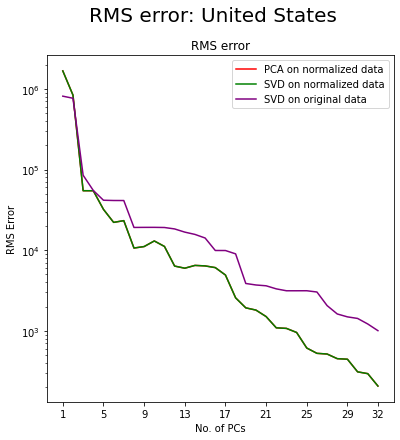

In [21]:
data_reconstruction_comparision(df, df_norm,  ['United States'])

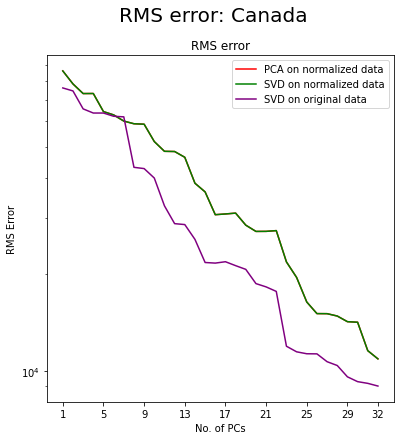

In [22]:
data_reconstruction_comparision(df, df_norm,  ['Canada'])

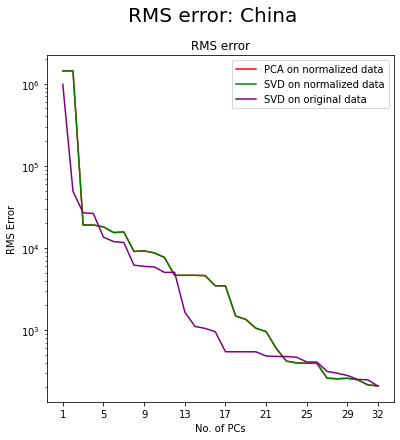

In [23]:
data_reconstruction_comparision(df, df_norm,  ['China'])

# Part 5: Let's collect another dataset! [2 Marks]
Create another dataset similar to the one provided in your handout using the raw information on COVID deaths (not vaccinations) provided [here](https://datahub.io/core/covid-19#resource-time-series-19-covid-combined). **[1]**

You need to manipulate the data to organize it in the desired format (i.e., the same format that was in previous parts). You are free to use any tools you like, from Excel to Python!
 
In the end, you should have a new CSV file with more dates (features) compared to the provided dataset. 


Upload your new dataset (in CSV format) to your colab notebook and repeat part 4. When analyzing Canada, you may use just Ontario. For China, you may use Beijing. **[1]**


Don't forget to add your new CSV file to Quercus for reference. The code below helps you to upload your new CSV file to your colab session. 

In [24]:
# load train.csv to Google Colab
from google.colab import files
# uploaded = files.upload()

df_CovidData = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/manish-kotra/COVID_data/main/time-series-19-covid-combined_csv.csv'
)

In [25]:
df_CovidData.head()

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,0,0.0,0
1,2020-01-23,Afghanistan,NaN,0,0.0,0
2,2020-01-24,Afghanistan,NaN,0,0.0,0
3,2020-01-25,Afghanistan,NaN,0,0.0,0
4,2020-01-26,Afghanistan,NaN,0,0.0,0


In [26]:
df_new  = df_CovidData.copy()
df_new  = df_new.drop(['Confirmed', 'Recovered'], axis='columns') # dropping not required columns
gkk     = df_new.groupby(['Country/Region', 'Province/State'])
df_new  = df_new.pivot(index=['Country/Region', 'Province/State'], 
                       columns=['Date'], values=['Deaths'])
df_new.columns  = df_new.columns.droplevel()
df_new.to_csv('Covid_Deaths.csv')

In [27]:
df_new.head()

,Date,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2022-01-14,2022-01-15,2022-01-16,2022-01-17,2022-01-18,2022-01-19,2022-01-20,2022-01-21,2022-01-22,2022-01-23
Country/Region,Province/State,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,0,0,0,0,0,0,0,0,0,0,...,7376,7378,7379,7381,7383,7386,7386,7390,7390,7393
Albania,NaN,0,0,0,0,0,0,0,0,0,0,...,3262,3265,3269,3271,3277,3283,3286,3292,3297,3305
Algeria,NaN,0,0,0,0,0,0,0,0,0,0,...,6393,6404,6412,6423,6435,6443,6453,6468,6481,6495
Andorra,NaN,0,0,0,0,0,0,0,0,0,0,...,142,142,142,142,142,142,144,144,144,144
Angola,NaN,0,0,0,0,0,0,0,0,0,0,...,1852,1857,1863,1866,1870,1877,1881,1884,1886,1888


In [28]:
## Normalizing dataframe
scaler2       = StandardScaler().fit(df_new)
X_std         = scaler2.transform(df_new)
df_new_norm   = pd.DataFrame(data=X_std, index=df_new.index, 
                             columns=df_new.columns)
df_new_norm.head()

,Date,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2022-01-14,2022-01-15,2022-01-16,2022-01-17,2022-01-18,2022-01-19,2022-01-20,2022-01-21,2022-01-22,2022-01-23
Country/Region,Province/State,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,-0.059868,-0.063294,-0.064765,-0.062834,-0.064444,-0.06458,-0.062741,-0.063695,-0.063192,-0.06251,...,-0.159796,-0.159906,-0.159985,-0.160110,-0.160216,-0.160254,-0.160375,-0.160418,-0.160542,-0.160600
Albania,NaN,-0.059868,-0.063294,-0.064765,-0.062834,-0.064444,-0.06458,-0.062741,-0.063695,-0.063192,-0.06251,...,-0.212905,-0.212955,-0.212962,-0.213045,-0.213006,-0.212874,-0.212857,-0.212761,-0.212774,-0.212737
Algeria,NaN,-0.059868,-0.063294,-0.064765,-0.062834,-0.064444,-0.06458,-0.062741,-0.063695,-0.063192,-0.06251,...,-0.172486,-0.172469,-0.172449,-0.172449,-0.172405,-0.172348,-0.172318,-0.172195,-0.172142,-0.172053
Andorra,NaN,-0.059868,-0.063294,-0.064765,-0.062834,-0.064444,-0.06458,-0.062741,-0.063695,-0.063192,-0.06251,...,-0.253182,-0.253236,-0.253269,-0.253345,-0.253313,-0.253157,-0.253076,-0.252970,-0.253011,-0.253051
Angola,NaN,-0.059868,-0.063294,-0.064765,-0.062834,-0.064444,-0.06458,-0.062741,-0.063695,-0.063192,-0.06251,...,-0.231107,-0.231116,-0.231085,-0.231140,-0.231096,-0.230906,-0.230842,-0.230745,-0.230781,-0.230808


In [29]:
## Function to get eigenvalues and corresponding eigenvectors using SVD for Original data
U_svd, S_svd, Vh_svd = np.linalg.svd(df_new) 
Smat = np.zeros((df_new.shape[0], df_new.shape[1]))
Smat[:len(S_svd), :len(S_svd)] = np.diag(S_svd)
eigenVectors_svd_new = Vh_svd.T

## Function to get eigenvalues and corresponding eigenvectors using SVD for Normalized data
U_svd_norm, S_svd_norm, Vh_svd_norm = np.linalg.svd(df_new_norm) 
Smat_norm = np.zeros((df_new_norm.shape[0], df_new_norm.shape[1]))
Smat_norm[:len(S_svd_norm), :len(S_svd_norm)] = np.diag(S_svd_norm)
eigenVectors_svd_new_norm = Vh_svd_norm.T

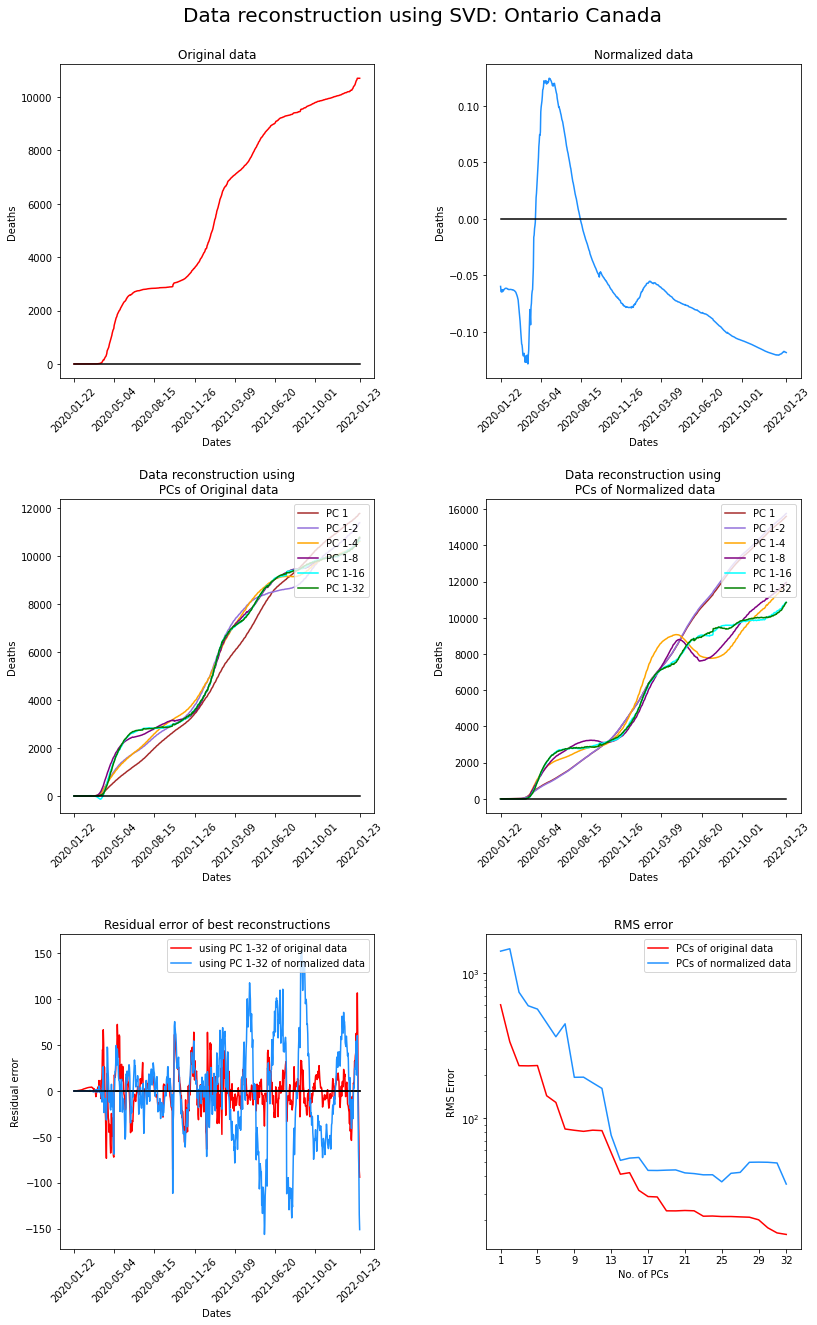

In [30]:
data_reconstruction_svd(df_new, df_new_norm, [('Canada', 'Ontario')], index_type=2, scaler=scaler2)

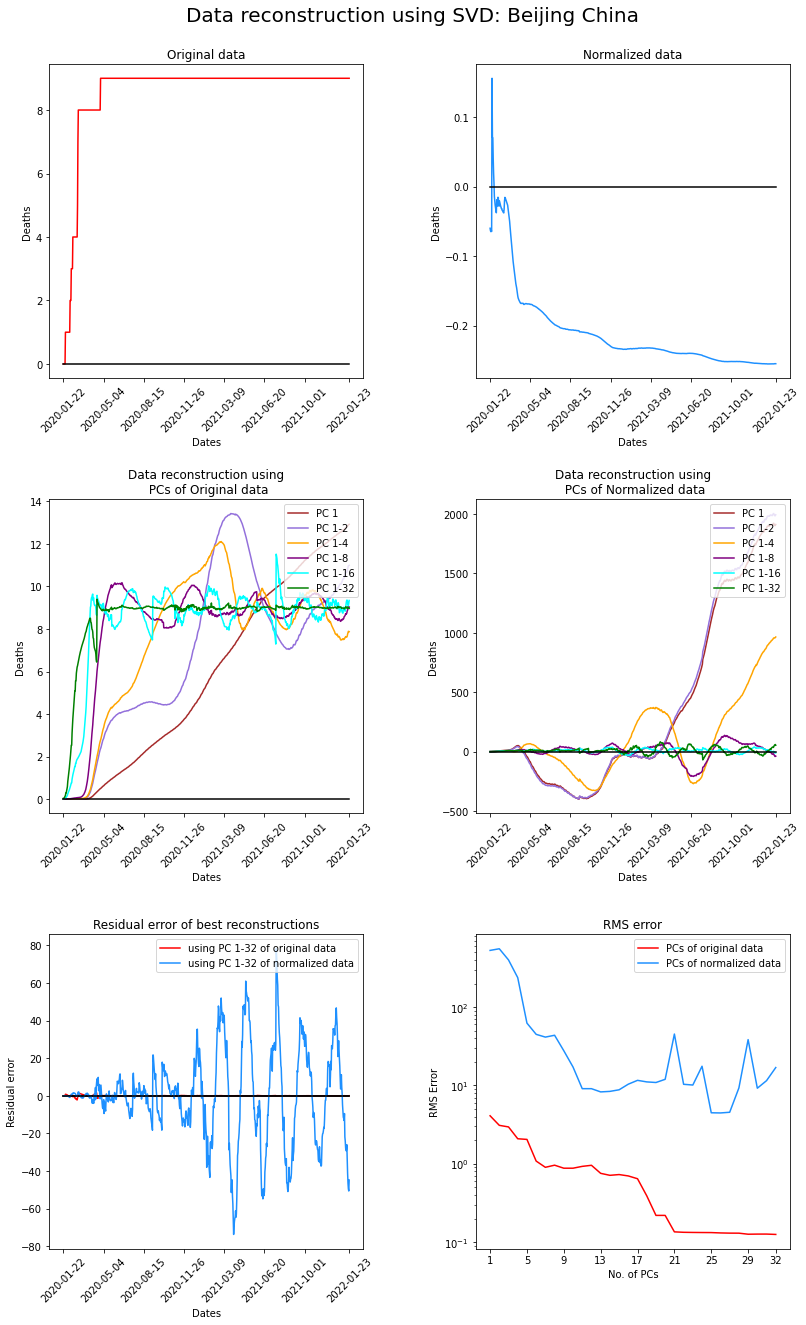

In [31]:
data_reconstruction_svd(df_new, df_new_norm, [('China', 'Beijing')], index_type=2, scaler=scaler2)

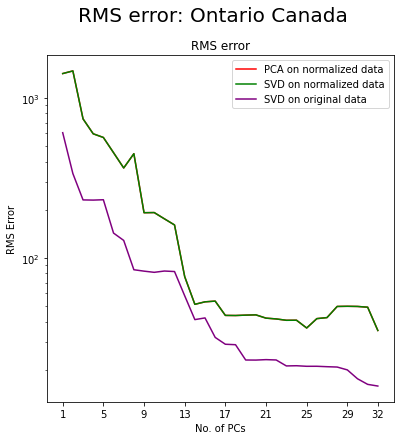

In [32]:
data_reconstruction_comparision(df_new, df_new_norm,  [('Canada', 'Ontario')], index_type=2, scaler=scaler2)

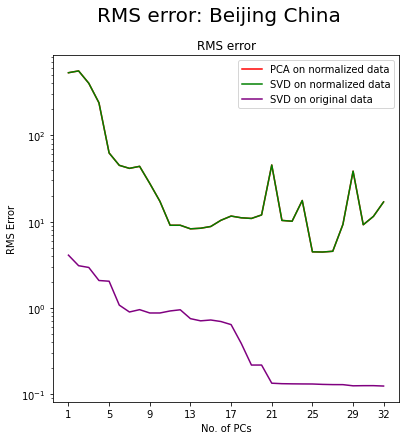

In [33]:
data_reconstruction_comparision(df_new, df_new_norm,  [('China', 'Beijing')], index_type=2, scaler=scaler2)

*Remarks: China is the anomaly in the data, in Beijing only 8 deaths are reported in the given time period as shown in the plots above (and in China as a whole only 5000 deaths reported during this time, which are very less compared to the death toll data of other countries). Hence these weird results can be seen in the plots*

In [38]:
%%shell
jupyter nbconvert --to html /content/W23_APS1070_Project_3.ipynb

[NbConvertApp] Converting notebook /content/W23_APS1070_Project_3.ipynb to html
[NbConvertApp] Writing 2937321 bytes to /content/W23_APS1070_Project_3.html


# References

Understanding PCA and SVD:

1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8

2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca

3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues

4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:

1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/

2. https://www.value-at-risk.net/principal-component-analysis/

Covid Data:

1. https://www.worldometers.info/coronavirus/

2. https://datahub.io/core/covid-19#resource-time-series-19-covid-combined

